In [16]:
import matplotlib.pyplot as plt
import pandas
from pandas import *

In [17]:
data_frame: DataFrame = pandas.read_csv('data/results.csv')

# Plotting a line chart of the scores of England team over time, when England played as a home team between 1872 and 1882

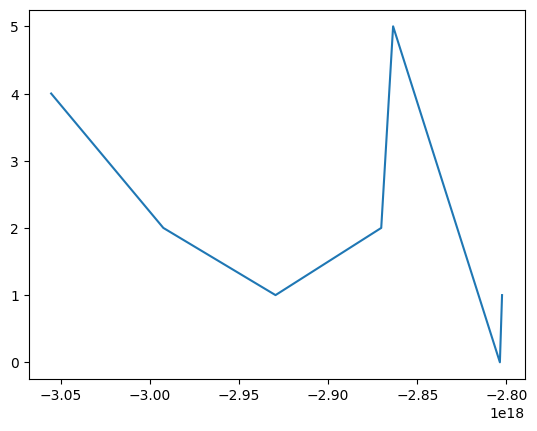

In [25]:
def line() -> None:
    data_frame['date'] = pandas.to_datetime(data_frame['date'])
    filtered_df = data_frame.loc[(data_frame['home_team'] == "England") &
                                 (data_frame['date'].dt.year >= 1872) & (data_frame['date'].dt.year <= 1882)]
    home_date_list = filtered_df.loc[filtered_df['home_team'] == "England", 'date'].values.tolist()
    home_score_list = filtered_df.loc[filtered_df['home_team'] == "England", 'home_score'].values.tolist()
    plt.plot(home_date_list, home_score_list)
    
line()

# Plotting a dot chart of the scores of England team over time, when England played as an away team between 1872 and 1882

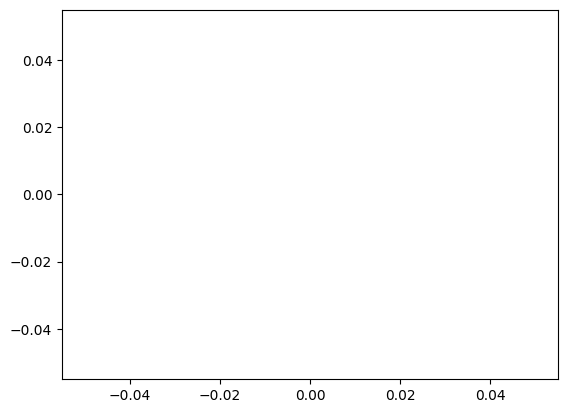

In [27]:
def dots() -> None: # TODO: fix
    data_frame['date'] = pandas.to_datetime(data_frame['date'])
    
    filtered_df = data_frame.loc[(data_frame['away_team'] == "England") &
                                 (data_frame['date'].dt.year >= 1872) & (data_frame['date'].dt.year <= 1882)]
    home_date_list = filtered_df.loc[filtered_df['home_team'] == "England", 'date'].values.tolist()
    home_score_list = filtered_df.loc[filtered_df['home_team'] == "England", 'home_score'].values.tolist()
    
    plt.scatter(home_date_list, home_score_list)

dots()